In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

##### https://realpython.com/knn-python/#use-knn-to-predict-the-age-of-sea-slugs

### Load the data

In [30]:
d = {'SepalLength': [5.1, 4.9, 4.7, 4.6, 5.0, 5.4], 'SepalWidth': [3.5, 3.0, 3.2, 3.1, 3.6, 3.9], 'PetalLength': [1.4, 1.4, 1.3, 1.5, 1.4, 1.7], 'PetalWidth': [0.2, 0.2, 0.2, 0.2, 0.2, 0.4], 'Name': ["Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa"]}
data = pd.DataFrame(data=d)

In [31]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)

In [32]:
abalone

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [33]:
abalone.columns = ["Sex",
                  "Length",
                  "Diameter",
                  "Height",
                  "Whole weight",
                  "Shucked weight",
                  "Viscera weight",
                  "Shell weight",
                  "Rings"]

In [34]:
abalone = abalone.drop("Sex", axis=1)
abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


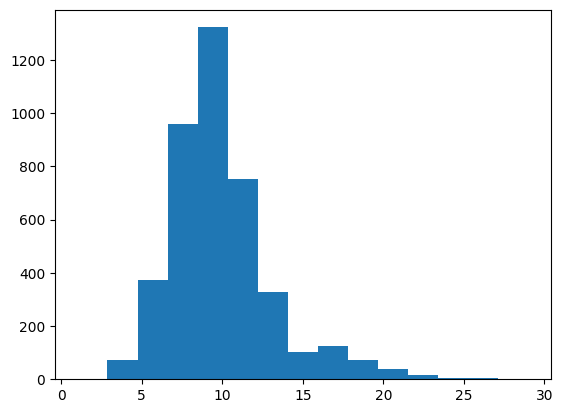

In [39]:
plt.hist(abalone["Rings"], bins=15)
plt.show()